# Discrepancy of Generalized Pareto parameter estimate $\hat k$

In [1]:
# uncomment to install arviz in the active environment
#!pip install arviz

In [2]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

import py.psis as psis

In [3]:
data = az.load_arviz_data("non_centered_eight")
log_weights = data.log_likelihood["obs"].stack(
    __sample__=["chain", "draw"]
)

lw_new, khat = az.psislw(log_weights)
khats_az = khat.values

khats_az

array([-0.75904637, -1.42879456, -1.4685748 , -1.6957333 , -1.59647378,
       -1.53114609, -1.55555131, -1.61090202])

We reload the dataset to make sure the computation gets the same inputs. This is necessary since while I write this `az.psislw` is mutating its input. See the [issue about it here](https://github.com/arviz-devs/arviz/issues/2376).

In [4]:
data = az.load_arviz_data("non_centered_eight")
log_weights = data.log_likelihood["obs"].stack(
    __sample__=["chain", "draw"]
)
khats = np.zeros(len(log_weights.values))
for i,lw in enumerate(log_weights.values):
    khat, sigmahat = psis.gpdfitnew(np.exp(lw))
    khats[i] = khat

khats

/home/ho/code/PSIS/py/psis.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(temp, out=temp)


array([-0.51473359, -2.94129762, -2.62328168, -3.22422551, -2.29807491,
       -3.10027427, -0.95715744, -2.76054336])

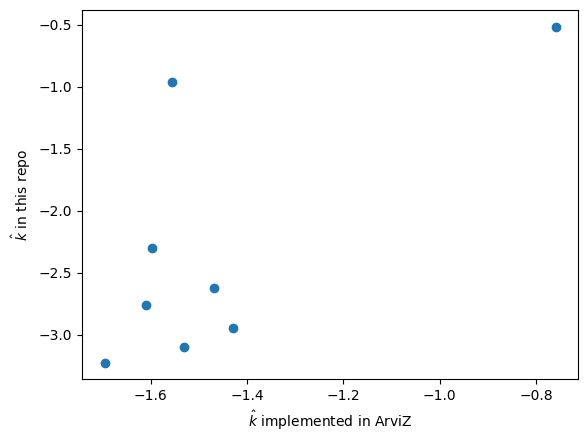

In [6]:
plt.scatter(khats_az, khats)
plt.xlabel("$\hat k$ implemented in ArviZ")
plt.ylabel("$\hat k$ in this repo");